In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cdf = pd.read_csv('bmi.csv')
cdf

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
def convert_status_to_gender(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
cdf['Status_Gender'] = cdf.apply(convert_status_to_gender,axis=1)

def convert_status_to_index(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
cdf['Status_Index'] = cdf.apply(convert_status_to_index,axis=1)

cdf.head()

,Gender,Height,Weight,Index,Status_Gender,Status_Index
0,Male,174,96,4,1,Obesity
1,Male,189,87,2,1,Normal
2,Female,185,110,4,0,Obesity
3,Female,195,104,3,0,Overweight
4,Male,149,61,3,1,Overweight


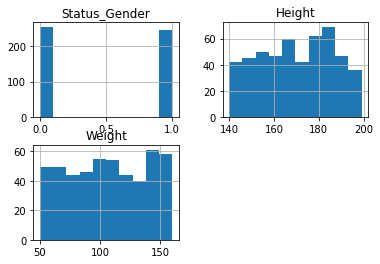

In [4]:
vis = cdf[['Status_Gender', 'Height','Weight']]
vis.hist()
plt.show()

In [5]:
cdf.describe()

,Height,Weight,Index,Status_Gender
count,500.000000,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000,0.490000
std,16.375261,32.382607,1.355053,0.500401
min,140.000000,50.000000,0.000000,0.000000
25%,156.000000,80.000000,3.000000,0.000000
50%,170.500000,106.000000,4.000000,0.000000
75%,184.000000,136.000000,5.000000,1.000000
max,199.000000,160.000000,5.000000,1.000000


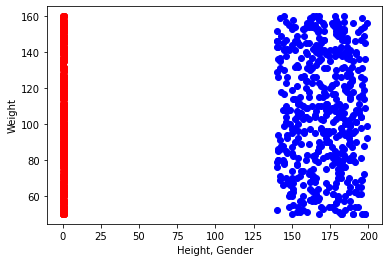

In [6]:
plt.scatter(cdf.Height, cdf.Weight, color='blue')
plt.scatter(cdf.Status_Gender, cdf.Weight, color='red')
plt.xlabel('Height, Gender')
plt.ylabel('Weight')
plt.show()

In [7]:
msk = np.random.rand(len(cdf)) < 0.7
train = cdf[msk]
test = cdf[~msk]

In [8]:
import joblib
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Status_Gender','Height']])
train_y = np.asanyarray(train[['Weight']])

regr.fit(train_x, train_y)
print('Coeficient : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coeficient :  [[-1.13830966  0.03038132]]
Intercept :  [99.79966216]


In [9]:
test_x = np.asanyarray(test[['Status_Gender','Height']])
test_y = np.asanyarray(test[['Weight']])

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

test_y_ = regr.predict(test_x)

print("Mean Squared Error (MSE) : %.2f" % mean_squared_error(test_y_,test_y))
print("Mean Absolute Error (MAE) : %.2f" % mean_absolute_error(test_y_,test_y))
print("Roots Mean Squared Error (RMSE) : %.2f" % math.sqrt(mean_squared_error(test_y_,test_y)))
print("R2-score : %.2f" % r2_score(test_y_,test_y))

Mean Squared Error (MSE) : 1096.24
Mean Absolute Error (MAE) : 28.81
Roots Mean Squared Error (RMSE) : 33.11
R2-score : -2192.16


In [11]:
pred_y = regr.predict(test_x)

In [12]:
dataFrame = pd.DataFrame({'Data Sebenarnya' : np.concatenate(test_y), 
                          'Data Prediksi' : np.concatenate(pred_y)})
dataFrame

,Data Sebenarnya,Data Prediksi
0,110,105.420206
1,111,103.340075
2,103,104.934105
3,107,104.448004
4,149,104.448004
...,...,...
144,115,103.552745
145,153,104.585710
146,55,104.387241
147,115,105.511350


In [13]:
#call model regression
model = regr
#save model
filename = 'modelregression.sav'
joblib.dump(model, filename)
#load model
loaded_model = joblib.load(filename)
#prediction model
loaded_model.predict([[1, 170]])

array([[103.82617658]])